# Analyze the following [Python/ R]
##### a. A horizontal bar chart of top 10 dealers by suspicious activity rate.
##### b. Comment: What do you observe? Are there clusters?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dealer_transaction_data.csv")

In [3]:
total_txn = df.groupby("dealer_id").size().reset_index(name="total_transactions")

In [4]:
total_txn

,dealer_id,total_transactions
0,DEALER_1,14
1,DEALER_10,24
2,DEALER_11,25
3,DEALER_12,12
4,DEALER_13,33
5,DEALER_14,19
6,DEALER_15,29
7,DEALER_16,22
8,DEALER_17,30
9,DEALER_18,20


In [5]:
flagged_df = df[(df["customer_nid_duplicate_flag"] == 1) | (df["same_phone_multiple_buyers_flag"] == 1)]
# suspicious_txn = flagged_df.groupby("dealer_id").size().reset_index(name="suspicious_transactions")

In [6]:
flagged_df

,dealer_id,transaction_id,sale_date,unit_sold,discount_applied,credit_approved,customer_nid_duplicate_flag,referral_code_used,same_phone_multiple_buyers_flag
20,DEALER_15,TRANS_1020,2023-03-19,3,10000,1,0,0,1
22,DEALER_14,TRANS_1022,2023-12-15,1,5000,1,1,1,0
24,DEALER_12,TRANS_1024,2023-07-07,1,10000,1,1,0,0
40,DEALER_16,TRANS_1040,2023-09-17,2,10000,0,1,1,0
41,DEALER_16,TRANS_1041,2023-05-09,3,5000,0,0,0,1
...,...,...,...,...,...,...,...,...,...
382,DEALER_4,TRANS_1382,2023-06-14,1,5000,1,0,1,1
384,DEALER_18,TRANS_1384,2023-02-19,2,10000,0,1,0,0
394,DEALER_13,TRANS_1394,2023-04-23,1,10000,1,1,1,0
395,DEALER_2,TRANS_1395,2023-03-12,2,15000,1,0,0,1


In [7]:
suspicious_txn = flagged_df.groupby("dealer_id").size().reset_index(name="suspicious_transactions")

In [8]:
suspicious_txn

,dealer_id,suspicious_transactions
0,DEALER_1,3
1,DEALER_10,3
2,DEALER_11,7
3,DEALER_12,7
4,DEALER_13,9
5,DEALER_14,5
6,DEALER_15,7
7,DEALER_16,8
8,DEALER_17,3
9,DEALER_18,5


In [9]:
dealer_summary = pd.merge(total_txn, suspicious_txn, on="dealer_id", how="left")

In [10]:
dealer_summary

,dealer_id,total_transactions,suspicious_transactions
0,DEALER_1,14,3
1,DEALER_10,24,3
2,DEALER_11,25,7
3,DEALER_12,12,7
4,DEALER_13,33,9
5,DEALER_14,19,5
6,DEALER_15,29,7
7,DEALER_16,22,8
8,DEALER_17,30,3
9,DEALER_18,20,5


In [12]:
dealer_summary

,dealer_id,total_transactions,suspicious_transactions
0,DEALER_1,14,3
1,DEALER_10,24,3
2,DEALER_11,25,7
3,DEALER_12,12,7
4,DEALER_13,33,9
5,DEALER_14,19,5
6,DEALER_15,29,7
7,DEALER_16,22,8
8,DEALER_17,30,3
9,DEALER_18,20,5


In [13]:
dealer_summary["suspicious_rate"] = dealer_summary["suspicious_transactions"] / dealer_summary["total_transactions"]

In [15]:
dealer_summary

,dealer_id,total_transactions,suspicious_transactions,suspicious_rate
0,DEALER_1,14,3,0.214286
1,DEALER_10,24,3,0.125000
2,DEALER_11,25,7,0.280000
3,DEALER_12,12,7,0.583333
4,DEALER_13,33,9,0.272727
5,DEALER_14,19,5,0.263158
6,DEALER_15,29,7,0.241379
7,DEALER_16,22,8,0.363636
8,DEALER_17,30,3,0.100000
9,DEALER_18,20,5,0.250000


In [14]:
top10 = dealer_summary.sort_values(by="suspicious_rate", ascending=False).head(10)

In [16]:
top10

,dealer_id,total_transactions,suspicious_transactions,suspicious_rate
3,DEALER_12,12,7,0.583333
7,DEALER_16,22,8,0.363636
15,DEALER_6,13,4,0.307692
2,DEALER_11,25,7,0.280000
12,DEALER_3,18,5,0.277778
4,DEALER_13,33,9,0.272727
5,DEALER_14,19,5,0.263158
10,DEALER_19,19,5,0.263158
9,DEALER_18,20,5,0.250000
6,DEALER_15,29,7,0.241379


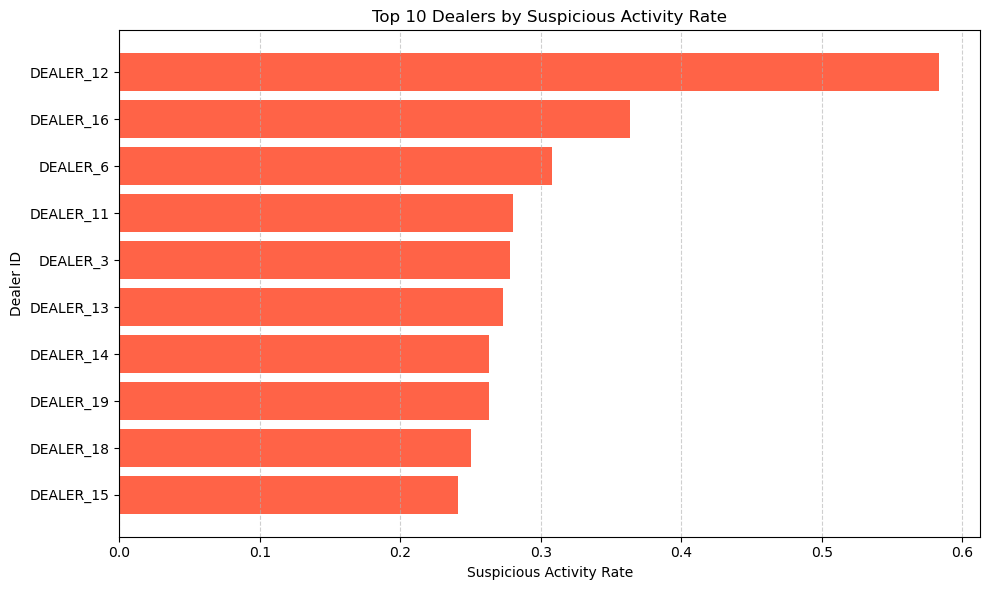

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(top10["dealer_id"], top10["suspicious_rate"], color='tomato')
plt.xlabel("Suspicious Activity Rate")
plt.ylabel("Dealer ID")
plt.title("Top 10 Dealers by Suspicious Activity Rate")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Observations:

## 🔍 Key Insights

### ✅ Minimum Suspicious Activity Across the Board
- Every dealer has **at least two or more suspicious transactions**.
- This confirms that **suspicious activity is not isolated or rare** among the dealers analyzed.

### 📈 Positive Correlation Between Total and Suspicious Transactions
- Dealers with a **higher number of total transactions** tend to have **more suspicious transactions** in absolute numbers.
- Conversely, dealers with **fewer total transactions** generally have **fewer suspicious ones** as well.

### 📊 Suspicious Activity Rate Trends
- Although suspicious counts rise with more transactions, the **suspicious rate (i.e., proportion of suspicious transactions)** does **not increase linearly**.
- For example, many dealers with **18–25 transactions** maintain a suspicious activity rate in the **20–30% range**, suggesting a **consistent proportion of flagged cases**.

### 🚩 High-Risk Outlier – DEALER_12
- `DEALER_12` shows a **suspicious activity rate of approximately 58%**, which is **significantly higher than all others**.
- This dealer is likely an **outlier** and a **potential high-risk profile**, demanding **closer audit and scrutiny**.

### 📉 Cluster Behavior
- Most **suspicious activity rates cluster in the 20–30% range** across the majority of dealers.
- This **uniformity supports the presence of a systemic pattern** in dealer behavior or in **fraud detection mechanisms**.
